In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#Disable the warnings
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### 1.	Programming: The project must be explored programmatically: this means that you must implement suitable Python tools (code and/or libraries) to complete the analysis required. All of this is to be implemented in a Jupyter Notebook. 

In [67]:
df1=pd.read_csv('Irish construction index data.csv', encoding="ISO-8859-1")

In [68]:
df1.shape

(460, 5)

In [69]:
df1.columns

Index(['ï»¿Statistic Label', 'Year', 'Type of Building and Construction',
       'UNIT', 'VALUE'],
      dtype='object')

In [70]:
df1.head()

,ï»¿Statistic Label,Year,Type of Building and Construction,UNIT,VALUE
0,Value of Production Index in Building and Cons...,2000,All building and construction,Base 2015=100,155.852221
1,Value of Production Index in Building and Cons...,2000,Building (excluding civil engineering),Base 2015=100,199.844255
2,Value of Production Index in Building and Cons...,2000,Residential building,Base 2015=100,311.698160
3,Value of Production Index in Building and Cons...,2000,Non-residential building,Base 2015=100,121.431248
4,Value of Production Index in Building and Cons...,2000,Civil engineering,Base 2015=100,63.619979


#### 4.	Testing & Optimisation: You are required to document and evaluate a testing and optimisation strategy for your analysis. As part of this, you may want to plan and document how you ensured your code is doing what it is meant to, as well as ensuring that the code is making good use of your resources (eg computing, time etc). Note any trade-offs that you've made in these areas.

In [71]:
df1 = df1.rename(columns={"ï»¿Statistic Label": "Statistic_Label"}) ## rename columns
df1 = df1.rename(columns={"Type of Building and Construction": "Type_of_Building_and_Construction"})

In [72]:
df1 = df1.drop(columns=["UNIT"]) # drop useless columns
df1

,Statistic_Label,Year,Type_of_Building_and_Construction,VALUE
0,Value of Production Index in Building and Cons...,2000,All building and construction,155.852221
1,Value of Production Index in Building and Cons...,2000,Building (excluding civil engineering),199.844255
2,Value of Production Index in Building and Cons...,2000,Residential building,311.698160
3,Value of Production Index in Building and Cons...,2000,Non-residential building,121.431248
4,Value of Production Index in Building and Cons...,2000,Civil engineering,63.619979
...,...,...,...,...
455,Volume of Production Index in Building and Con...,2022,All building and construction,130.320963
456,Volume of Production Index in Building and Con...,2022,Building (excluding civil engineering),135.733187
457,Volume of Production Index in Building and Con...,2022,Residential building,115.723415
458,Volume of Production Index in Building and Con...,2022,Non-residential building,138.403250


In [73]:
df1.info() ###  check the dataset for size, missing values et cetera to impose efficiencies.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Statistic_Label                    460 non-null    object 
 1   Year                               460 non-null    int64  
 2   Type_of_Building_and_Construction  460 non-null    object 
 3   VALUE                              460 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 14.5+ KB


In [74]:
df1.memory_usage()

Index                                 128
Statistic_Label                      3680
Year                                 3680
Type_of_Building_and_Construction    3680
VALUE                                3680
dtype: int64

In [75]:
df1.dtypes

Statistic_Label                       object
Year                                   int64
Type_of_Building_and_Construction     object
VALUE                                float64
dtype: object

In [76]:
### change datatypes from object to category (for efficiency) 
df1.Statistic_Label = df1.Statistic_Label.astype("category")
# 
df1.Type_of_Building_and_Construction = df1.Type_of_Building_and_Construction.astype("category")
print(df1.dtypes)

Statistic_Label                      category
Year                                    int64
Type_of_Building_and_Construction    category
VALUE                                 float64
dtype: object


In [77]:
df1["Year"] = pd.to_datetime(df1["Year"], format="%Y")
df1["VALUE"].astype("float32")
df1.tail()

,Statistic_Label,Year,Type_of_Building_and_Construction,VALUE
455,Volume of Production Index in Building and Con...,2022-01-01,All building and construction,130.320963
456,Volume of Production Index in Building and Con...,2022-01-01,Building (excluding civil engineering),135.733187
457,Volume of Production Index in Building and Con...,2022-01-01,Residential building,115.723415
458,Volume of Production Index in Building and Con...,2022-01-01,Non-residential building,138.403250
459,Volume of Production Index in Building and Con...,2022-01-01,Civil engineering,105.572834


In [78]:
df1.memory_usage()

Index                                 128
Statistic_Label                       664
Year                                 3680
Type_of_Building_and_Construction     672
VALUE                                3680
dtype: int64

#### We have saved on memory usage.  This dataset is really small but one could easily apply the efficiencies to a large dataset

####	2. Data structures: You are required to gather and process data that has been stored in at least two distinct formats. For example, this can be data in a CSV file, from a MySQL database or from a web API in JSON format

In [79]:
# df1=pd.read_csv('Irish construction index data.csv', encoding="ISO-8859-1")
# df2=pd.read_excel('planning-permissions.xlsx')
df = pd.read_json("planning-permissions.json")
df.sample(5)


,geo_point_2d,geo_shape,application_number,pprn,proposal,location,ward_description,application_type,application_description_1,decision,decision_description,decision_date,perm_expiry_date,appeal_number,appeal_decision,appeal_decision_date
3527,"{'lon': -1.1510228914, 'lat': 52.6282215084}","{'type': 'Feature', 'geometry': {'coordinates'...",20220464,KOK6121,"Alterations, construction of single and two st...",19 Harrow Road,Westcotes,DEV,Operational development - full application,CO,Conditional approval,2022-09-12,2025-09-12,None,None,None
3350,"{'lon': -1.1258329487, 'lat': 52.643595299}","{'type': 'Feature', 'geometry': {'coordinates'...",20213079,NLC4650,Removal of condition 2 (Parking) attached to p...,19 Lower Willow Street,Wycliffe,DEV,Operational development - full application,CO,Conditional approval,2022-05-30,2025-05-30,None,None,None
1594,"{'lon': -1.1464574937, 'lat': 52.6702479804}","{'type': 'Feature', 'geometry': {'coordinates'...",20200061,KFI1697,Discharge of condition attached to planning pe...,Bewcastle Grove,Abbey,CON,Application to discharge conditions,SA,Unconditional approval,2020-02-24,2023-02-21,None,None,None
8986,"{'lon': -1.1388307668, 'lat': 52.63758735}","{'type': 'Feature', 'geometry': {'coordinates'...",20181141,LMN7372,INSTALLATION OF 2.5 METRE HIGH MULTI-FUNCTIONA...,"VAUGHAN WAY, NORTH OF HIGHCROSS SHOPPING CENTRE",Belgrave,DEV,Operational development - full application,CO,Conditional approval,2018-10-05,2021-10-05,None,None,None
5670,"{'lon': -1.1608651685, 'lat': 52.5930123451}","{'type': 'Feature', 'geometry': {'coordinates'...",20191739,IWO3589,DISCHARGE OF CONDITIONS ATTACHED TO PLANNING P...,"BRIDGEMERE CLOSE, REAR OF 133 - 141 LUTTERWORT...",Aylestone,CON,Application to discharge conditions,SA,Unconditional approval,2019-12-11,None,None,None,None


In [80]:
###  Alternatively if the author wished to read into pandas a database from Mysql he could have tried this.
### import pandas as pd
#import mysql.connector

#mydb = mysql.connector.connect(
#  host="localhost",
#  user="myusername",
#  password="mypassword",
#  database="mydatabase"
#)

#df = pd.read_sql("SELECT * FROM mytable", mydb)

#print(df)

###  However he chose to use excel, csv and json files instead.

#### 3.	Documentation: The project documentation must include sound justifications and explanation of your code choices. Code quality standards should also be applied. (see above)

In [81]:
################################################

#### 5.	Data manipulation: For each of the different data sources, compare and contrast at least two relevant libraries and techniques for a) processing and b) aggregating the respective data, in order to justify your chosen libraries/techniques. [0-20]

##### 1. NumPy is a Python library used for working with arrays. Numpy. is therefore ideal for csv and excel files, both of which have rows and columns-type structures. It also has useful functions when you are working in the domain of linear algebra (www.google.com).

#### 2. Seaborn is a Python data visualization library which is based on Matplotlib (another python library). It provides a high-level package for useful and attractive graphs.  Thus it's helpful for working with csv files (ibid.).

####  3. Simplejson is a Python library used for working with JSON data. It provides functions for encoding and decoding JSON data (ibid.).

#### 4. Chart js is an open-source JavaScript library for making HTML-based charts. It's one of the simplest visualization libraries for JavaScript, and it features support for line, bar, scatter, doughnut, pie, radar, area, and bubble charts (www.makeuseof.com)

####  According to pydata.org, pandas is a 'Python package providing fast, flexible, and expressive data structures designed to *make* *processing* with “relational” or “labeled” data both easy and intuitive". It aims to be the "gold standard" in practical, real-world data analysis in Python (www.365datascience.com).

####  Pandas has a tool for data aggregation. One can use the groupby() method to group data and then apply an aggregation function such as sum(), mean(), count() to it (ibid.).  As regards json files, one can use pandas and groupby functions on them too.  One uses the read_json() method in this case.  To aggregate the data in your json file, again one can use the groupby() function (www.makeuseof.com).

###  Methodology -  SEMMA (www.geeksforgeeks.com) was used in this report

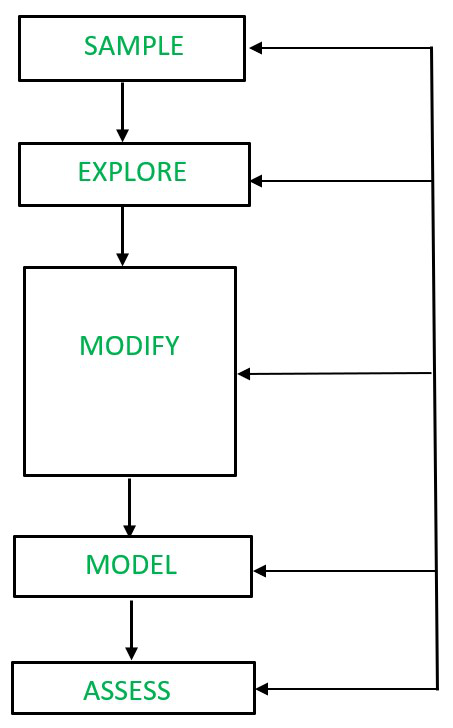

###  Tufte's principles

### Above all else show data.
Maximize the data-ink ratio.
Erase non-data-ink.
Erase redundant data-ink.
Revise and edit of data-ink:

### https://jtr13.github.io/cc19/tuftes-principles-of-data-ink.html